## Data And Packages Loading 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('XYZCorp_LendingData.txt', sep = '\t')

C:\Users\HP\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
# Dataframe Shape
data.shape

(855969, 71)

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
# Drop 'id' and 'member_id' as it is not required into model building process
data.drop(['id','member_id'], inplace = True, axis = 1)

In [7]:
# Statistics for Numerical Data
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,1.000000,50.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,8.000000,188.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


## Data Preprocessing

In [16]:
# Saperating Dependant and Independant Variables
y = data['default_ind']
x = data.drop('default_ind', axis = 1)

In [17]:
x.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Value Treatment

In [29]:
drop_columns = []

def get_na(data): 
    null_vars = data.isnull().sum()
    null_vars = null_vars[null_vars > 0]
    if(len(null_vars) > 0):
        null_vars.sort_values(inplace=True)
        null_vars.plot.bar(figsize=(15,4))
    else:
        print("No column have NA values")

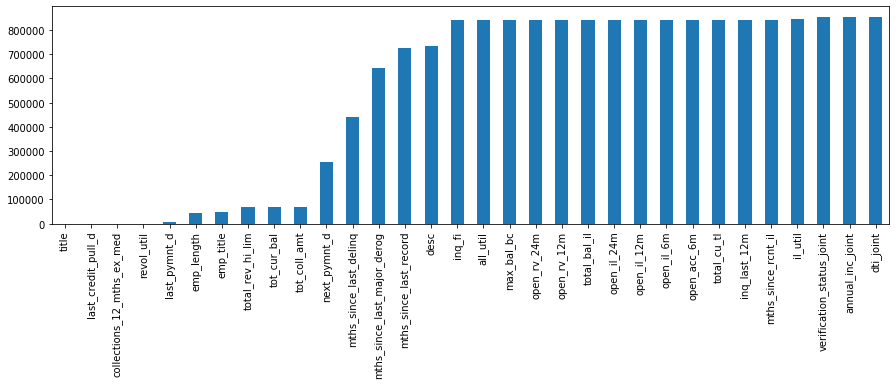

In [30]:
get_na(data)

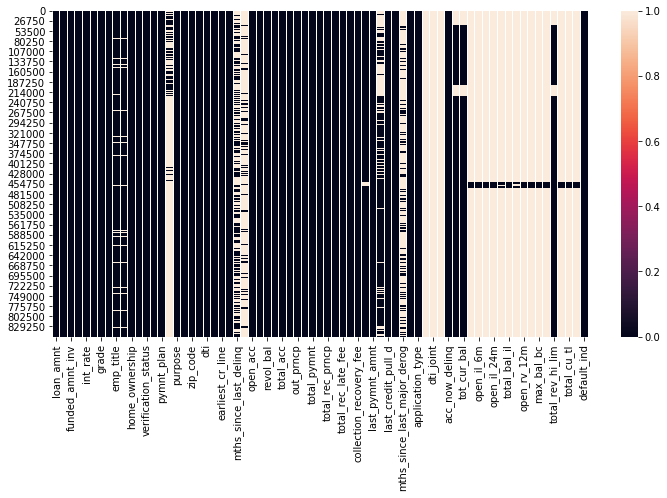

In [34]:
plt.figure(figsize = (12,6))
sns.heatmap(data.isna())

## Exploratory Data Analysis

## Model Building

## Model Evaluation

## Conclusion